# Model Training

## https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

First thing, Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings("ignore")


In [3]:
# next load the data
df = pd.read_csv('heart_2020_cleaned.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Linear Regression Model

In [10]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [12]:
df['HeartDisease'] = df['HeartDisease'].replace({'Yes':1, 'No':0})
df['Smoking'] = df['Smoking'].replace({'Yes': 1, 'No': 0})
df['AlcoholDrinking'] = df['AlcoholDrinking'].replace({'Yes': 1, 'No': 0})
df['Stroke'] = df['Stroke'].replace({'Yes': 1, 'No': 0})

df['DiffWalking'] = df['DiffWalking'].replace({'Yes': 1, 'No': 0})
df['Sex'] = df['Sex'].replace({'Male': 1, 'Female': 0})

df['PhysicalActivity'] = df['PhysicalActivity'].replace({'Yes': 1, 'No': 0})
df['Asthma'] = df['Asthma'].replace({'Yes': 1, 'No': 0})
df['KidneyDisease'] = df['KidneyDisease'].replace({'Yes': 1, 'No': 0})
df['SkinCancer'] = df['SkinCancer'].replace({'Yes': 1, 'No': 0})


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [14]:
df2 = pd.get_dummies(df, columns=['AgeCategory','Race','GenHealth','Diabetic'],dtype='int')

In [17]:
df2.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,0,1,5.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,0,1,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,8.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,6.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,8.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,1,4.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
7,0,31.64,1,0,0,5.0,0.0,1,0,0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
8,0,26.45,0,0,0,0.0,0.0,0,0,0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
9,0,40.69,0,0,0,0.0,0.0,1,1,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [20]:
df2.shape

(319795, 42)

**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [26]:
x = df2.drop('HeartDisease',axis=1)
y = df2['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=8000, stratify=y)


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=8000, stratify=y_train)


In [30]:
x_train.shape, y_train.shape,x_val.shape,y_val.shape, x_test.shape, y_test.shape

((303795, 41), (303795,), (8000, 41), (8000,), (8000, 41), (8000,))

In [33]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()# Fit-transform on train data
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)
x_val_scaled = scale.transform(x_val)

In [36]:
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix

In [40]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression().fit(x_train_scaled, y_train)

In [ ]:

y_train_pred = lrmodel.predict(x_train_scaled)
print(f'\nF1: {f1_score(y_train, y_train_pred):.4f}')
print(f'Recall: {recall_score(y_train, y_train_pred):.4f}')
print(f'Precision: {precision_score(y_train, y_train_pred):.4f}')


y_val_pred = lrmodel.predict(x_val_scaled)
print(f'\nF1: {f1_score(y_val, y_val_pred):.4f}')
print(f'Recall: {recall_score(y_val, y_val_pred):.4f}')
print(f'Precision: {precision_score(y_val, y_val_pred):.4f}')


y_test_pred = lrmodel.predict(x_test_scaled)
print(f'\nF1: {f1_score(y_test, y_test_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_test_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.4f}')



F1: 0.1858
Recall: 0.1115
Precision: 0.5552

F1: 0.1738
Recall: 0.1043
Precision: 0.5215

F1: 0.1713
Recall: 0.1028
Precision: 0.5123


In [188]:
from imblearn.combine import SMOTEENN

In [ ]:
smoteenn = SMOTEENN(random_state=42)


x_train_resampled, y_train_resampled = smoteenn.fit_resample(x_train,y_train)


print("train:")
print(y_train.value_counts())
print("resample:")
print(pd.Series(y_train_resampled).value_counts())

In [193]:
lrmodel_smote = LogisticRegression().fit(x_train_resampled, y_train_resampled)

In [194]:
y_train_pred_smote = lrmodel_smote.predict(x_train_resampled)
print(f'\nF1: {f1_score(y_train_resampled, y_train_pred_smote):.4f}')
print(f'Recall: {recall_score(y_train_resampled, y_train_pred_smote):.4f}')
print(f'Precision: {precision_score(y_train_resampled, y_train_pred_smote):.4f}')


F1: 0.9100
Recall: 0.9134
Precision: 0.9067


In [130]:
y_val_pred = lrmodel_smote.predict(x_val_scaled)
print(f'\nF1: {f1_score(y_val, y_val_pred):.4f}')
print(f'Recall: {recall_score(y_val, y_val_pred):.4f}')
print(f'Precision: {precision_score(y_val, y_val_pred):.4f}')


y_test_pred = lrmodel_smote.predict(x_test_scaled)
print(f'\nF1: {f1_score(y_test, y_test_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_test_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.4f}')


F1: 0.3466
Recall: 0.7872
Precision: 0.2222

F1: 0.3448
Recall: 0.7810
Precision: 0.2212


[[43405 15080]
 [ 1165  4309]]


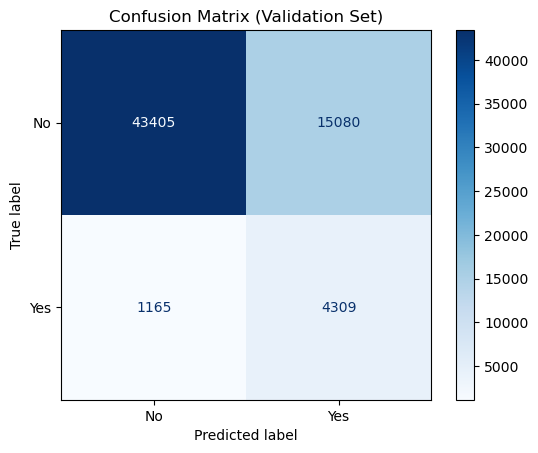

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(y_val, y_val_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Validation Set)")
plt.show()


In [138]:
pypred = lrmodel.predict_proba(x_val_scaled)

In [140]:
pypred

array([[0.98588409, 0.01411591],
       [0.8691729 , 0.1308271 ],
       [0.89557732, 0.10442268],
       ...,
       [0.99502815, 0.00497185],
       [0.89751835, 0.10248165],
       [0.92324522, 0.07675478]])

In [143]:
thresholds = np.arange(0.01, 0.95, 0.01)
f1s = []
precisions = []
recalls = []

for threshold in thresholds:
    pypred = lrmodel.predict_proba(x_val_scaled)
    y_pred = (pypred[:, 1] >= threshold).astype(int)
    precisions.append(precision_score(y_val, y_pred))
    recalls.append(recall_score(y_val, y_pred))
    f1s.append(f1_score(y_val, y_pred))


<Figure size 800x500 with 0 Axes>

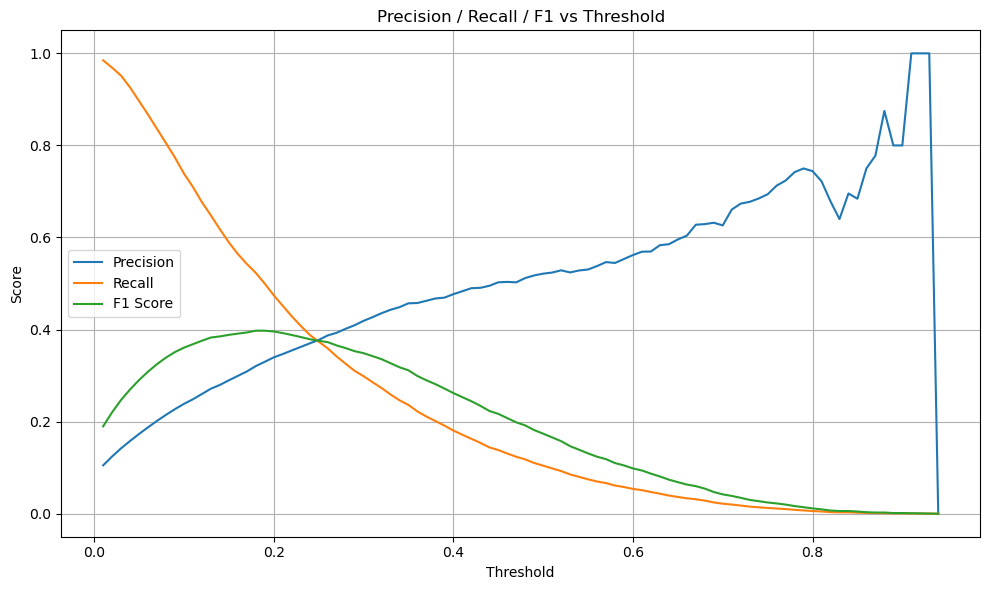

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))


plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', linestyle='-')
plt.plot(thresholds, recalls, label='Recall',  linestyle='-')
plt.plot(thresholds, f1s, label='F1 Score', linestyle='-')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision / Recall / F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score

# 
best_thresh = 0.15  

# === train ===
y_train_proba = lrmodel.predict_proba(x_train_scaled)[:, 1]
y_train_pred = (y_train_proba >=best_thresh).astype(int)

print("Train:")
print(f'F1:        {f1_score(y_train, y_train_pred):.4f}')
print(f'Recall:    {recall_score(y_train, y_train_pred):.4f}')
print(f'Precision: {precision_score(y_train, y_train_pred):.4f}\n')

# === val ===
y_val_proba = lrmodel.predict_proba(x_val_scaled)[:, 1]
y_val_pred = (y_val_proba >= best_thresh).astype(int)

print("Validation:")
print(f'F1:        {f1_score(y_val, y_val_pred):.4f}')
print(f'Recall:    {recall_score(y_val, y_val_pred):.4f}')
print(f'Precision: {precision_score(y_val, y_val_pred):.4f}\n')

# === test ===
y_test_proba = lrmodel.predict_proba(x_test_scaled)[:, 1]
y_test_pred = (y_test_proba >= best_thresh).astype(int)

print("Test:")
print(f'F1:        {f1_score(y_test, y_test_pred):.4f}')
print(f'Recall:    {recall_score(y_test, y_test_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.4f}')


Train:
F1:        0.3930
Recall:    0.5963
Precision: 0.2931

Validation:
F1:        0.3885
Recall:    0.5893
Precision: 0.2898

Test:
F1:        0.3887
Recall:    0.5901
Precision: 0.2898


In [186]:
lrmodel.score(x_test, y_test)

0.08649290952016135

## Random Forest Model

In [38]:
# create an instance of the model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(
            n_estimators=200,
            max_depth=12,                # 稍减深度
            min_samples_leaf=10,         # 控制过拟合
            class_weight='balanced',
            random_state=42
        )
rfmodel.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=10, n_estimators=200, random_state=42)

In [ ]:

y_train_pred = rfmodel.predict(x_train)
print(f'\nF1: {f1_score(y_train, y_train_pred):.4f}')
print(f'Recall: {recall_score(y_train, y_train_pred):.4f}')
print(f'Precision: {precision_score(y_train, y_train_pred):.4f}')


y_val_pred = rfmodel.predict(x_val)
print(f'\nF1: {f1_score(y_val, y_val_pred):.4f}')
print(f'Recall: {recall_score(y_val, y_val_pred):.4f}')
print(f'Precision: {precision_score(y_val, y_val_pred):.4f}')


y_test_pred = rfmodel.predict(x_test)
print(f'\nF1: {f1_score(y_test, y_test_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_test_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.4f}')


F1: 0.3533
Recall: 0.7814
Precision: 0.2283

F1: 0.3577
Recall: 0.7898
Precision: 0.2312

F1: 0.3499
Recall: 0.7620
Precision: 0.2271


In [41]:
x_test.head(1)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
299413,28.48,0,0,0,0.0,0.0,0,1,1,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [43]:
xx=x_test.iloc[0,].to_numpy()

In [44]:
print(xx)

[28.48  0.    0.    0.    0.    0.    0.    1.    1.    7.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.
  0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
  1.    1.    0.    0.    0.  ]


In [58]:
xx.shape

(41,)

In [45]:
xx_prep=rfmodel.predict([xx])

In [46]:
print(xx_prep)

[0]


In [47]:
y_test_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [48]:
y_test_pred.shape

(8000,)

In [60]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 299413 to 13502
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   BMI                                  8000 non-null   float64
 1   Smoking                              8000 non-null   int64  
 2   AlcoholDrinking                      8000 non-null   int64  
 3   Stroke                               8000 non-null   int64  
 4   PhysicalHealth                       8000 non-null   float64
 5   MentalHealth                         8000 non-null   float64
 6   DiffWalking                          8000 non-null   int64  
 7   Sex                                  8000 non-null   int64  
 8   PhysicalActivity                     8000 non-null   int64  
 9   SleepTime                            8000 non-null   float64
 10  Asthma                               8000 non-null   int64  
 11  KidneyDisease                

In [184]:
rfmodel.score(x_test, y_test)

0.7823449397270126

In [202]:
rfmodel_smote = RandomForestClassifier(
            n_estimators=1000,
            max_depth=10,
            min_samples_leaf=5,
            max_features='sqrt',
            random_state=42
        )
rfmodel_smote.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=1000,
                       random_state=42)

In [ ]:

y_train_pred_smote = rfmodel_smote.predict(x_train_resampled)
print(f'\nF1: {f1_score(y_train_resampled, y_train_pred_smote):.4f}')
print(f'Recall: {recall_score(y_train_resampled, y_train_pred_smote):.4f}')
print(f'Precision: {precision_score(y_train_resampled, y_train_pred_smote):.4f}')


y_val_pred = rfmodel_smote.predict(x_val)
print(f'\nF1: {f1_score(y_val, y_val_pred):.4f}')
print(f'Recall: {recall_score(y_val, y_val_pred):.4f}')
print(f'Precision: {precision_score(y_val, y_val_pred):.4f}')


y_test_pred = rfmodel_smote.predict(x_test)
print(f'\nF1: {f1_score(y_test, y_test_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_test_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.4f}')


F1: 0.8650
Recall: 0.8855
Precision: 0.8455

F1: 0.2912
Recall: 0.8177
Precision: 0.1772

F1: 0.2881
Recall: 0.8042
Precision: 0.1755


In [216]:
thresholds = np.arange(0.05, 1.0, 0.05)
f1s = []
precisions = []
recalls = []

for threshold in thresholds:
    pypred = rfmodel.predict_proba(x_val)
    y_pred = (pypred[:, 1] >= threshold).astype(int)
    precisions.append(precision_score(y_val, y_pred))
    recalls.append(recall_score(y_val, y_pred))
    f1s.append(f1_score(y_val, y_pred))


<Figure size 800x500 with 0 Axes>

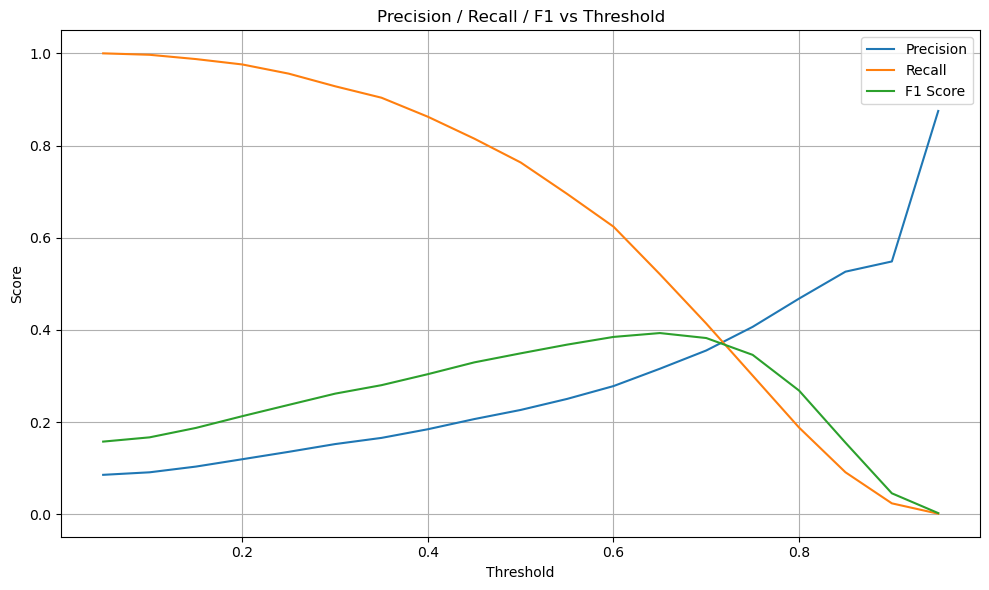

In [ ]:
plt.figure(figsize=(8, 5))


plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', linestyle='-')
plt.plot(thresholds, recalls, label='Recall',  linestyle='-')
plt.plot(thresholds, f1s, label='F1 Score', linestyle='-')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision / Recall / F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score


best_thresh = 0.55 

# === train ===
y_train_pred_smote = rfmodel_smote.predict_proba(x_train_resampled)[:, 1]
y_train_pred = (y_train_pred_smote >=best_thresh).astype(int)

print("Train:")
print(f'F1:        {f1_score(y_train_resampled, y_train_pred):.4f}')
print(f'Recall:    {recall_score(y_train_resampled, y_train_pred):.4f}')
print(f'Precision: {precision_score(y_train_resampled, y_train_pred):.4f}\n')

# === val ===
y_val_proba = rfmodel_smote.predict_proba(x_val)[:, 1]
y_val_pred = (y_val_proba >= best_thresh).astype(int)

print("Validation:")
print(f'F1:        {f1_score(y_val, y_val_pred):.4f}')
print(f'Recall:    {recall_score(y_val, y_val_pred):.4f}')
print(f'Precision: {precision_score(y_val, y_val_pred):.4f}\n')

# === test ===
y_test_proba = rfmodel_smote.predict_proba(x_test)[:, 1]
y_test_pred = (y_test_proba >= best_thresh).astype(int)

print("Test:")
print(f'F1:        {f1_score(y_test, y_test_pred):.4f}')
print(f'Recall:    {recall_score(y_test, y_test_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.4f}')

Train:
F1:        0.8215
Recall:    0.7705
Precision: 0.8798

Validation:
F1:        0.3122
Recall:    0.7075
Precision: 0.2003

Test:
F1:        0.3084
Recall:    0.6964
Precision: 0.1981
